# LAB_KMEANS_Customer_Segmentation

**Import data and libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Customer Segmentation

If you want to grow your business, it makes sense to put in the effort to understand the characteristics of your customers for at least two reasons: 
1. To continue to provide this group with what they’re looking for and keep them as customers
2. To target your marketing efforts toward prospects who resemble your best customers.

By targeting your acquisition marketing through insights into your best customers, you attract customers who are likely to respond to the strengths of your business and remain loyal to it. **Instead of targeting all customers at once, you can start segment your customers and use different strategy for each group. With this approach, you will also focus on your potential customers to develop strategies for them.**

But, before you can start to understand your best customers, you first need to identify them. And that’s where a simple database marketing tool called recency, frequency, monetary analysis (or RFM) comes in handy.

In our example, we will be using a sample dataset of an online retail.

# Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = '/content/drive/MyDrive/FTMLE | 2021.09 | South Sandwich/Data/OnlineRetail.csv'

# Load dataset

This dataset contains all purchases made for an online retail company based in the UK during an eight month period.

In [ ]:
df= pd.read_csv(PATH,encoding = "unicode_escape")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
(pd.to_datetime(df.InvoiceDate).dt.year.astype('str') + pd.to_datetime(df.InvoiceDate).dt.month.astype('str')).unique()

array(['201012', '20111', '20112', '20113', '20114', '20115', '20116',
       '20117', '20118', '20119', '201110', '201111', '201112'],
      dtype=object)

# Clean our data

By looking at the data and each columns, you should be able to investigate a bit and do some basic cleaning. We will **drop** some errornous records (or records that don't make sense)


In [ ]:
def drop_values(df):

    # For this problem, we will only look at UK market
    df.drop(df[df.Country!='United Kingdom'].index, inplace=True)
    df.drop('Country',axis=1,inplace=True)

    # only 1 negative unit price
    df.drop(df[df['UnitPrice']<0].index, inplace = True) 
    
    # drop some erroneous records
    df.drop(df[(df['Quantity']<0) & (df['UnitPrice']==0)].index,inplace=True)
    
    # drop nan description
    df.drop(df[df['Description'].isna()].index,inplace=True)
    df.drop(df[df['CustomerID'].isna()].index,inplace=True)

In [ ]:
# run this after finishing your function
drop_values(df)

# Feature engineering

For this section, we will create some features that we think is going to be useful for our data analysis/visualization and our end goal: **segment customer into different groups**. There is one new column that you can create immediately from this datasetdataset, that is Revenue

In [ ]:
def create_date_features(df,date_feature):
    df[date_feature] = pd.to_datetime(df[date_feature])
    df['Year'] = df[date_feature].dt.year
    df['Month'] = df[date_feature].dt.month
    df['Day'] = df[date_feature].dt.day
    df['DayOfWeek'] = df[date_feature].dt.day
    df['WeekOfYear']= df[date_feature].dt.week

In [ ]:
create_date_features(df,'InvoiceDate')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,DayOfWeek,WeekOfYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,2010,12,1,1,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,2010,12,1,1,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48


In [ ]:
# YOUR CODE HERE
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,DayOfWeek,WeekOfYear,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,2010,12,1,1,48,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,2010,12,1,1,48,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34


# Calculate New Customer Ratio, Retention Rate and perform visualization using pandas and seaborn

In [ ]:
sns.set_theme()

In [ ]:
# to be safe, let's make a copy of our dataframe
df_plots = df.copy()

For an online retail, we can select our metric (something that can help the company grows) as **Monthly Revenue**. Let’s see how our data look like on jupyter notebook.

**Important**: For the rest of the EDA, we will calculate some metrics **monthly**, so it will be convenient that for our dataframe, we can add a column to show year + month. We will call this column **InvoiceYearMonth**

In [ ]:
df_plots['InvoiceYearMonth'] = df_plots['InvoiceDate'].map(lambda date: 100*date.year + date.month)

## Monthly Revenue and Percentage change for each month

You need to create a dataframe that stores the revenue for each month

In [ ]:
df_plots['InvoiceYearMonth'].unique()

array([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112])

In [ ]:
df_plots[['CustomerID','InvoiceYearMonth']]

,CustomerID,InvoiceYearMonth
0,17850.0,201012
1,17850.0,201012
2,17850.0,201012
3,17850.0,201012
4,17850.0,201012
...,...,...
541889,15804.0,201112
541890,13113.0,201112
541891,13113.0,201112
541892,13113.0,201112


In [ ]:
df_plots.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,DayOfWeek,WeekOfYear,Revenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,2010,12,1,1,48,15.30,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,2010,12,1,1,48,22.00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012


In [ ]:
# YOUR CODE HERE
monthly_revenue = df_plots.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()

In [ ]:
# you should have something like this
monthly_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,483799.740
1,201101,351981.280
2,201102,348853.630
3,201103,456917.870
4,201104,376744.411


In [ ]:
monthly_revenue['InvoiceYearMonth']=monthly_revenue['InvoiceYearMonth'].astype('str')

**Plot monthly revenue**

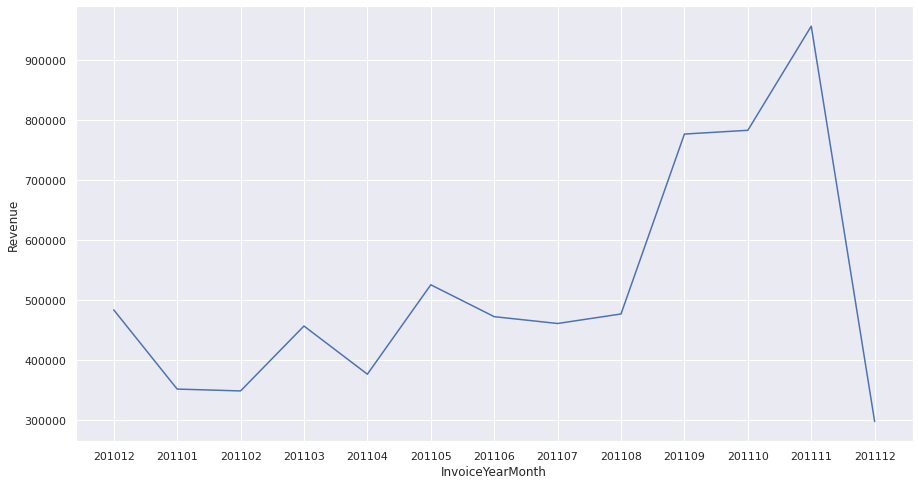

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=monthly_revenue,x='InvoiceYearMonth',y='Revenue')

In general, revenue is growing, especially from August 2011. Focus on a big drop in revenue in December 2011. Why is there a big drop?

**ANSWER HERE:** 

## New customer ratio and Retention rate

### New Customer Ratio
- This is a good indicator to determine if we are losing our existing customers
- "New customer" is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example.
   

**Here are the steps you need to do in order to find New Customer Ratio**

1. Create a dataframe that contains CustomerId and their earliest InvoiceDate (also known as earliest purchase date)
2. Since we are doing this monthly, you only need to consider Month and Year of this date
3. Merge this dataframe to the df_plots dataframe
4. Create a new column called UserType
- If a user's earliest InvoiceDate is after their current InvoiceDate: this is existing user
- If a user's earliest InvoiceDate is the same as their current InvoiceDate: this is new user

In [ ]:
Customer=df_plots[['CustomerID','InvoiceYearMonth']]

In [ ]:
Customer=Customer.groupby('CustomerID').min()

In [ ]:
new_df=pd.merge(df_plots,Customer,on='CustomerID',how='left')

In [ ]:
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,DayOfWeek,WeekOfYear,Revenue,InvoiceYearMonth_x,InvoiceYearMonth_y
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,2010,12,1,1,48,15.30,201012,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,2010,12,1,1,48,22.00,201012,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,2011,12,9,9,49,23.40,201112,201105
361874,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,2011,12,9,9,49,23.60,201112,201012
361875,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,2011,12,9,9,49,30.00,201112,201012
361876,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,2011,12,9,9,49,214.80,201112,201012


In [ ]:
def customertype(df):
    if df['InvoiceYearMonth_x'] > df['InvoiceYearMonth_y']: 
        return' Existing user'
    else:
        return 'New user'

In [ ]:
new_df['UserType']=new_df.apply(customertype,axis=1)

In [ ]:
new_df.rename(columns={'InvoiceYearMonth_x':'InvoiceYearMonth','InvoiceYearMonth_y':'MinPurchaseYearMonth'},inplace=True)

In [ ]:
# As a hint, this should be what you have from step 3

In [ ]:
# And this is my version that I have after performing step 4. You should see the UserType column (last row, as I am doing transposing)
df_plots.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850,17850,17850,17850,17850
Year,2010,2010,2010,2010,2010
Month,12,12,12,12,12
Day,1,1,1,1,1


In [ ]:
new_df.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00,2010-12-01 08:26:00
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850,17850,17850,17850,17850
Year,2010,2010,2010,2010,2010
Month,12,12,12,12,12
Day,1,1,1,1,1


In [ ]:
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,Month,Day,DayOfWeek,WeekOfYear,Revenue,InvoiceYearMonth,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,2010,12,1,1,48,15.30,201012,201012,New user
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012,201012,New user
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,2010,12,1,1,48,22.00,201012,201012,New user
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012,201012,New user
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,1,48,20.34,201012,201012,New user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361873,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,2011,12,9,9,49,23.40,201112,201105,Existing user
361874,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,2011,12,9,9,49,23.60,201112,201012,Existing user
361875,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,2011,12,9,9,49,30.00,201112,201012,Existing user
361876,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,2011,12,9,9,49,214.80,201112,201012,Existing user


We have successfully identify the New and Existing customers for each month.

While we are at it, let's calculate the monthly revenue generated by each UserType. We want to see what is the total revenue generated by New user and total revenue generated by Existing user, for each month (hint: this requires groupby)

In [ ]:
# YOUR CODE HERE
CustomerMonth=new_df.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
CustomerMonth.head()

,InvoiceYearMonth,UserType,Revenue
0,201012,New user,483799.74
1,201101,Existing user,195275.51
2,201101,New user,156705.77
3,201102,Existing user,220994.63
4,201102,New user,127859.00


Note: you should exclude the first month (Dec 2010) so the UserType will make more sense, and we will also exclude the last month (Dec 2011) as we don't have enough data in Dec 2011

In [ ]:
CustomerMonth=CustomerMonth.iloc[1:-2,:]

In [ ]:
CustomerMonth

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing user,195275.510
2,201101,New user,156705.770
3,201102,Existing user,220994.630
4,201102,New user,127859.000
5,201103,Existing user,296350.030
6,201103,New user,160567.840
7,201104,Existing user,268226.660
8,201104,New user,108517.751
9,201105,Existing user,434725.860
10,201105,New user,90847.490


In [ ]:
# After this, you should have a dataframe like this

Let's plot the monthly revenue for each UserType. You can use seaborn and lineplot for this

In [ ]:
CustomerMonth['InvoiceYearMonth']=CustomerMonth['InvoiceYearMonth'].astype('str')

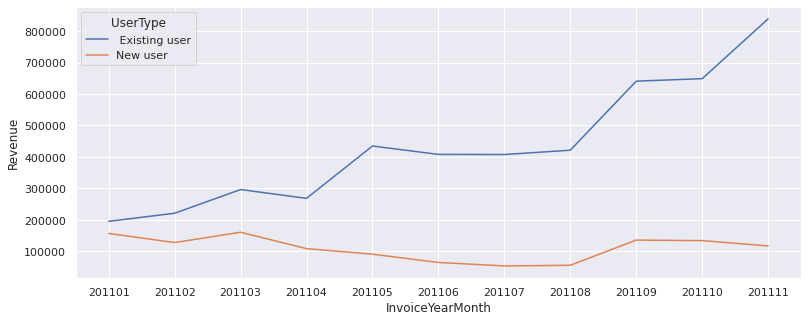

In [ ]:
# YOUR CODE HERE
plt.figure(figsize=(13,5))
sns.lineplot(data=CustomerMonth,x='InvoiceYearMonth',y='Revenue',hue='UserType')

Existing customers are showing a positive trend and tell us that our customer base is growing. New customers, however, have a slight negative trend between March 2011 to August 2011.

### Retention Rate
- indicates how many customers we retain over specific time window.
- Should be monitored very closely because it indicates how well your service is and how well your product fits the market
- The code to produce Retention Rate is provided to you, but **make sure to discuss the code with your classmates to fully understand it**

**Step 1**: Create a crosstab between CustomerID and InvoiceYearMonth

In [ ]:
#identify which users are active by looking at their revenue per month
user_purchase = new_df.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

In [ ]:
user_purchase.head()

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31


In [ ]:
#create retention matrix
retention = pd.pivot_table(data=user_purchase,
                           index='CustomerID',
                           columns='InvoiceYearMonth',
                           values='Revenue',
                           aggfunc='count',
                           fill_value=0).reset_index()

retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [ ]:
months = retention.columns[1:-1] # skip the last month
months

Index([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108,
       201109, 201110, 201111],
      dtype='object', name='InvoiceYearMonth')

**Step 2**: Create an array of dictionary which keeps Retained & Total User count for each month


In [ ]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = retention.columns[1:-1] # skip the first and last month

retention_list = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = selected_month
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retention.loc[(retention[selected_month]>0) & (retention[prev_month]>0),selected_month].sum()
    retention_list.append(retention_data)

In [ ]:
retention_df= pd.DataFrame(retention_list)
retention_df['RetentionRate'] = retention_df['RetainedUserCount']/retention_df['TotalUserCount']

In [ ]:
retention_df

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201101,684,322,0.470760
1,201102,714,263,0.368347
2,201103,923,305,0.330444
3,201104,817,310,0.379437
4,201105,985,369,0.374619
5,201106,943,417,0.442206
6,201107,899,379,0.421580
7,201108,867,391,0.450980
8,201109,1177,417,0.354291
9,201110,1285,502,0.390661


Plot Retention rate vs month

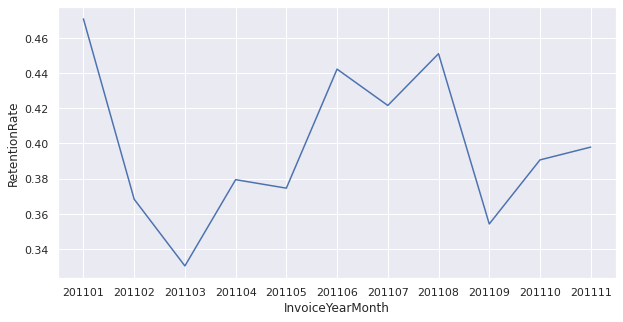

In [ ]:
retention_df.InvoiceYearMonth = retention_df.InvoiceYearMonth.map(str)
plt.figure(figsize=(10,5))
sns.lineplot(data=retention_df,x='InvoiceYearMonth',y='RetentionRate')

Monthly Retention Rate significantly jumped from June to August and went back to previous levels afterwards. You might want to dig deep into September 2011 as there is a massive drop (45% down to 35%)

# Customer Segmentation

In [ ]:
#@title Run this to start question 1

submission.generate_question(0, globals(), height='100px')

Your answer :

SelectMultiple(description='Your answer:', options=('A', 'B', 'C'), value=())

Output()

Why we do segmentation?

**Because you can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.**

Customers who use your platform have **different needs** and they have **their own different profile.**

You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on churn probability and take actions. 

**There are some common and useful segmentation methods as well. We are going to implement one of them to our business: RFM.**

**RFM stands for Recency - Frequency - Monetary Value.**

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

Theoretically we will have segments like below:

- **Low Values**: Customers who are less active than others, not very frequent buyer/visitor and generates very low or zero net revenue.
- **Mid Values**: In the middle of everything. Using our platform oftently (but not as much as our High Values), fairly frequent and generates moderate revenue.
- **High Values**: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

## Recency

**How can we calculate Recency in this dataset**
- Find out most recent purchase date of each customer and **see how many days they are inactive for**
- After having number of inactive days for each customer, **we will apply K-means clustering to assign customers a recency score.**

**Why do we need this**

- The more recently a customer has made a purchase with a company, the more likely he or she will continue to keep the business and brand in mind for subsequent purchases
- Such information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs. Marketing efforts could be made to remind them that it has been a while since their last transaction while offering them an incentive to rekindle their interests.

Steps:
1. Find the latest InvoiceDate for each Customer
2. Find the differences between the latest date of our entire dataset and the latest InvoiceDate for each customer. This will be the Recency

In [ ]:
recency = new_df[['CustomerID','InvoiceDate']].groupby('CustomerID').max()

In [ ]:
recency

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12747.0,2011-12-07 14:34:00
12748.0,2011-12-09 12:20:00
12749.0,2011-12-06 09:56:00
12820.0,2011-12-06 15:12:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [ ]:
recency['Recency']=(new_df['InvoiceDate'].max() - recency.InvoiceDate).dt.days

In [ ]:
recency=recency.reset_index()

In [ ]:
recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [ ]:
# You should have something like this (I am showing only the first 5 rows)

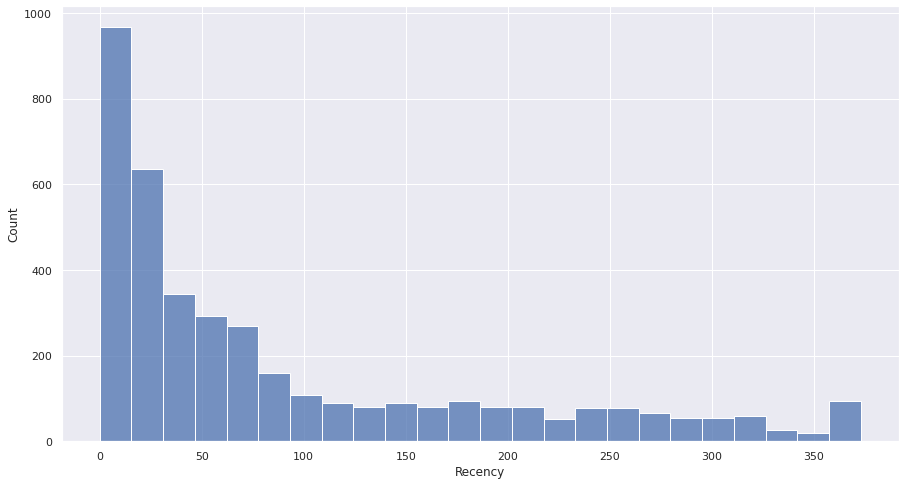

In [ ]:
# You can quickly plot a histogram of Recency to see their distribution
plt.figure(figsize=(15,8))
sns.histplot(data=recency,x='Recency')

### Apply kmeans on Recency to put users in groups

Using elbow method to approximate the number of clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
recency.drop(columns='InvoiceDate',inplace=True)

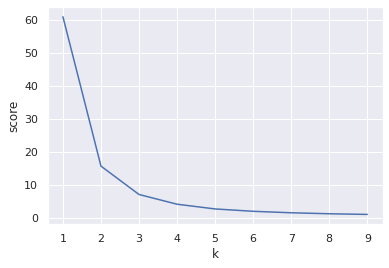

In [ ]:
k_values = range(1,10)
k_mean_models = [KMeans(n_clusters=k) for k in k_values]
scores = [kmean.fit(recency).score(recency) for kmean in k_mean_models]

norm_scores = [score/max(scores) for score in scores]

plt.plot(k_values,norm_scores)
plt.xlabel('k')
# plt.xticks(range(1, 10))
plt.ylabel('score');

For this LAB we will use K = 4 to help with the diversity of our customer segmentation

In [ ]:
# YOUR CODE HERE
kmeans = KMeans(n_clusters=4)
kmeans.fit(recency[['Recency']])
recency['RecencyCluster'] = kmeans.predict(recency[['Recency']])

In [ ]:
recency.head()

,CustomerID,Recency,RecencyCluster
0,12346.0,325,1
1,12747.0,1,3
2,12748.0,0,3
3,12749.0,3,3
4,12820.0,2,3


In [ ]:
#@title Hint

'''
We have sucessfully cluster our customers. 
However, in order to use the cluster indices to be our Recency Score, we need to rearrange the indices a bit. 
The higher the recency, the less the value that customer brings to us, 
so higher recency should result in a lower score.
'''

'\nWe have sucessfully cluster our customers. \nHowever, in order to use the cluster indices to be our Recency Score, we need to rearrange the indices a bit. \nThe higher the recency, the less the value that customer brings to us, \nso higher recency should result in a lower score.\n'

We will use the function below for this task (Make sure to set ascending)

In [ ]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

recency = order_cluster('RecencyCluster', 'Recency',recency,False)

In [ ]:
recency.head()

,CustomerID,Recency,RecencyCluster
0,12346.0,325,0
1,12829.0,321,0
2,12831.0,261,0
3,12834.0,282,0
4,12845.0,266,0


In [ ]:
recency.groupby('RecencyCluster').Recency.describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
1,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
2,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0
3,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0


Higher score for Recency = better customers (as their inactive time is low)

## Frequency

**How can we calculate frequency for this dataset**

We just need to find total number orders for each customer. 

**Why do we need this**

The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment or replacement. 

In order to increase customers' frequency, we can try to predict their purchase cycle, for example when a customer needs to buy new groceries, marketing efforts could be directed towards reminding them to visit the business when items such as eggs or milk have been depleted.

In [ ]:
# YOUR CODE HERE
frequency=new_df[['CustomerID','InvoiceDate']].groupby('CustomerID').count().reset_index()

In [ ]:
frequency.rename(columns={'InvoiceDate':'Frequency'},inplace=True)

In [ ]:
# This is what you should have (first 5 rows)
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59


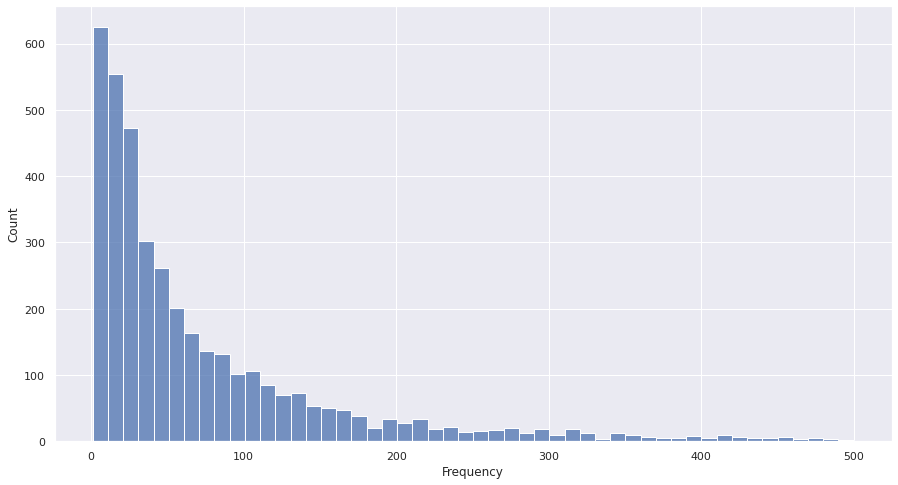

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=frequency[frequency['Frequency']<=500],x='Frequency')
plt.xticks=[x for x in range(0,600,100)]

In [ ]:
# Plot the histogram on Frequency
# YOUR CODE HERE

### Applying kmeans

Used the same K as above to keep the range of score consistent

In [ ]:
# YOUR CODE HERE
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequency[['Frequency']])
frequency['FrequencyCluster'] = kmeans.predict(frequency[['Frequency']])

In [ ]:
#order the frequency cluster
frequency = order_cluster('FrequencyCluster', 'Frequency',frequency,True)

In [ ]:
frequency.head()

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12747.0,103,0
2,12820.0,59,0
3,12821.0,6,0
4,12822.0,47,0


In [ ]:
#see details of each cluster
frequency.groupby('FrequencyCluster').Frequency.describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


As the same notation as recency clusters, high frequency number indicates better customers.

## Revenue

Revenue shows the intention of customers to spend, or the purchasing power of customers

Note: Businesses that focus more on viewership, readership, or surfing-oriented products, could use Engagement parameters instead of Monetary factors. This results in using RFE – a variation of RFM. Also, this Engagement parameter could be defined based on bounce rate, visit duration, number of pages visited, time spent per page, etc.

In [ ]:
# YOUR CODE HERE
revenue=new_df[['CustomerID','Revenue']].groupby('CustomerID').sum().reset_index()

In [ ]:
revenue.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


In [ ]:
# What you should have
revenue.head()

,CustomerID,Revenue
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29072.10
3,12749.0,3868.20
4,12820.0,942.34


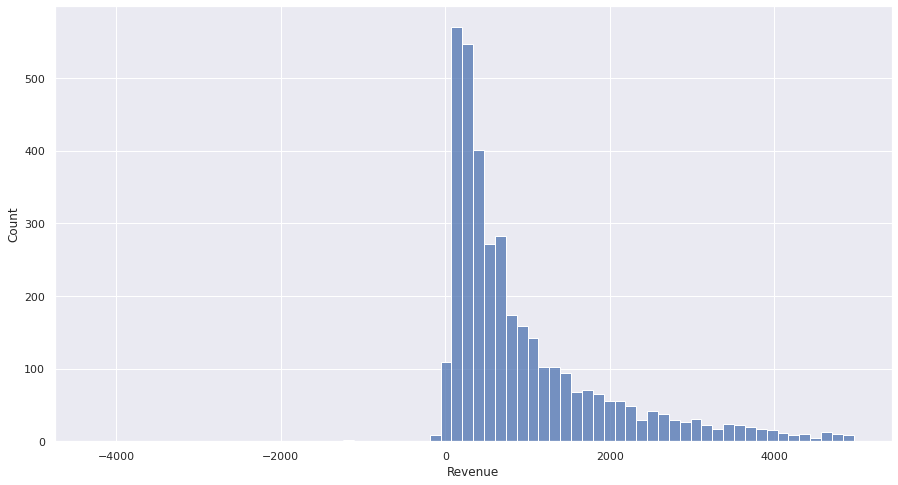

In [ ]:
# plot histogram for Revenue
plt.figure(figsize=(15,8))
sns.histplot(data=revenue[revenue['Revenue']<5000],x='Revenue')
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE
kmeans =KMeans(n_clusters=4)
kmeans.fit(revenue[['Revenue']])
revenue['RevenueCluster'] = kmeans.predict(revenue[['Revenue']])

In [ ]:
#order the cluster numbers
revenue = order_cluster('RevenueCluster', 'Revenue',revenue,True)

In [ ]:

#show details of the dataframe
revenue.groupby('RevenueCluster').Revenue.describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


# Calculate RFM score for each customer

Merge recency, frequency and revenue together using pandas

In [ ]:

# YOUR CODE HERE
final_rfm = pd.merge(recency,frequency,how='left',on='CustomerID')
final_rfm = pd.merge(final_rfm,revenue,how='left',on='CustomerID')

In [ ]:
final_rfm.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,12346.0,325,0,2,0,0.00,0
1,12829.0,321,0,12,0,253.05,0
2,12831.0,261,0,9,0,215.05,0
3,12834.0,282,0,18,0,312.38,0
4,12845.0,266,0,27,0,354.09,0


In [ ]:
final_rfm.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,12346.0,325,0,2,0,0.00,0
1,12829.0,321,0,12,0,253.05,0
2,12831.0,261,0,9,0,215.05,0
3,12834.0,282,0,18,0,312.38,0
4,12845.0,266,0,27,0,354.09,0


In [ ]:
final_rfm['RFM_score'] = final_rfm.RecencyCluster + final_rfm.FrequencyCluster + final_rfm.RevenueCluster*2

Here we value Revenue more than Recency and Frequency, so we give it some weight.

This depends of the bussiness goal of the company.

In [ ]:
final_rfm.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score
0,12346.0,325,0,2,0,0.00,0,0
1,12829.0,321,0,12,0,253.05,0,0
2,12831.0,261,0,9,0,215.05,0,0
3,12834.0,282,0,18,0,312.38,0,0
4,12845.0,266,0,27,0,354.09,0,0


In [ ]:
final_rfm.groupby('RFM_score')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
RFM_score,,,
0,304.584388,21.995781,303.339705
1,185.094643,32.310714,478.070770
2,78.802832,46.834423,840.153336
3,20.861886,68.438911,1079.151608
4,16.495868,302.942149,2666.011529
5,17.238806,154.910448,7469.424776
6,9.841727,377.985612,7819.577122
7,7.318182,888.863636,17212.819545
8,8.083333,403.916667,41205.515833


The scoring above clearly shows us that customers with score 8 is our best customers whereas 0 is the worst.

To keep things simple, better we name these scores:
- 0 to 2: Low Value
- 3 to 5: Mid Value
- 5+: High Value

In [ ]:
final_rfm['Segmentation'] = 'Low'
final_rfm.loc[final_rfm.RFM_score>2,'Segmentation']='Mid'
final_rfm.loc[final_rfm.RFM_score>5,'Segmentation']='High'

In [ ]:
final_rfm.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,RFM_score,Segmentation
0,12346.0,325,0,2,0,0.00,0,0,Low
1,12829.0,321,0,12,0,253.05,0,0,Low
2,12831.0,261,0,9,0,215.05,0,0,Low
3,12834.0,282,0,18,0,312.38,0,0,Low
4,12845.0,266,0,27,0,354.09,0,0,Low


In [ ]:
final_rfm.Segmentation.value_counts()

Low     1952
Mid     1815
High     183
Name: Segmentation, dtype: int64

## Visualizing the clusters

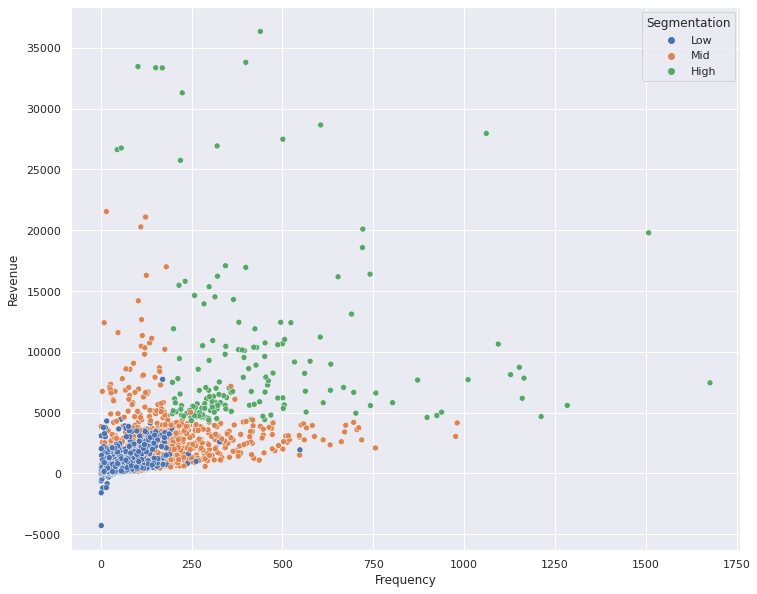

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm.query("Revenue < 50000 and Frequency < 2000")
                               , x="Frequency", y="Revenue", hue="Segmentation");

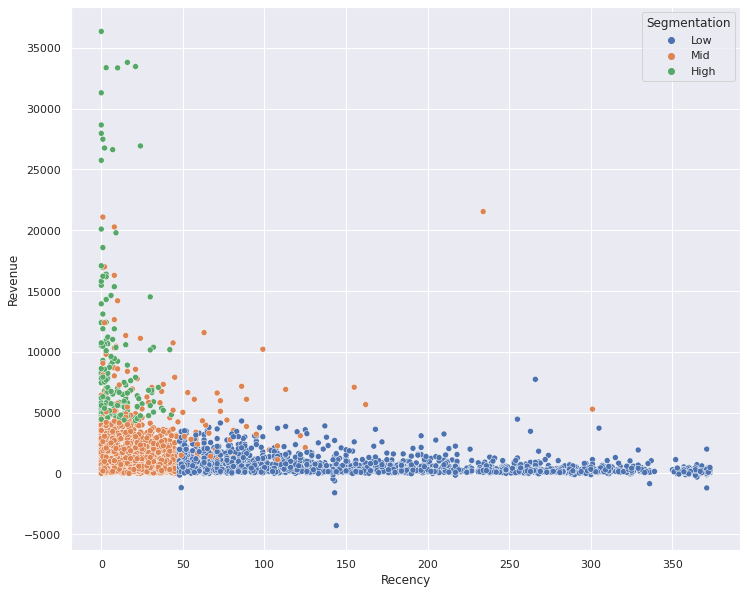

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm.query("Revenue < 50000 and Frequency < 2000")
                               , x="Recency", y="Revenue", hue="Segmentation");

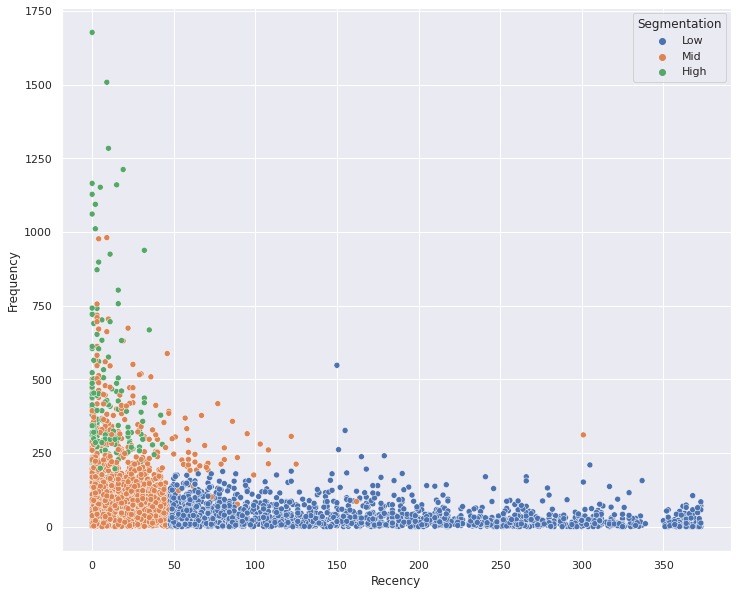

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=final_rfm.query("Revenue < 50000 and Frequency < 2000")
                               , x="Recency", y="Frequency", hue="Segmentation");

# Optional: Another way to cluster using Kmeans

Alternatively of calculating and picking RFM score, we can keep data intact and use K-Means on the hold data

In [ ]:
data_new=final_rfm[['CustomerID','Recency','Frequency','Revenue']]
data_new = data_new.set_index('CustomerID')

In [ ]:
data_new.describe()

,Recency,Frequency,Revenue
count,3950.000000,3950.000000,3950.000000
mean,90.778481,91.614684,1713.385669
std,100.230349,220.557389,6548.608224
min,0.000000,1.000000,-4287.630000
25%,16.000000,17.000000,282.255000
50%,49.000000,41.000000,627.060000
75%,142.000000,101.000000,1521.782500
max,373.000000,7983.000000,256438.490000


After that we can use two kind of method to choose the best K for our cluster

## Elbow Method

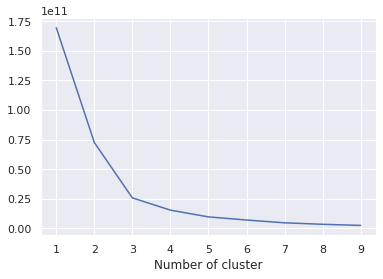

In [ ]:
from sklearn.cluster import KMeans

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_new)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

## Silhouette score

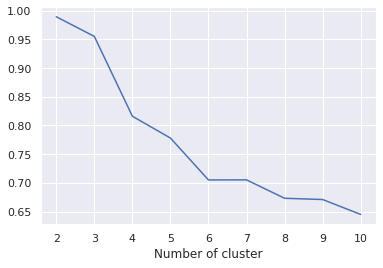

In [ ]:
from sklearn.metrics import silhouette_score

sil = {}
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_new)
  labels = kmeans.labels_
  sil[k] = silhouette_score(data_new, labels, metric = 'euclidean')
  
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of cluster")
plt.show()

We can see that 2 and 3 seems to be a good cluster size

For keeping the diversity of clustering, we used K = 3

In [ ]:
# YOUR CODE HERE
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_new)
data_new['Cluster'] = kmeans.predict(data_new)

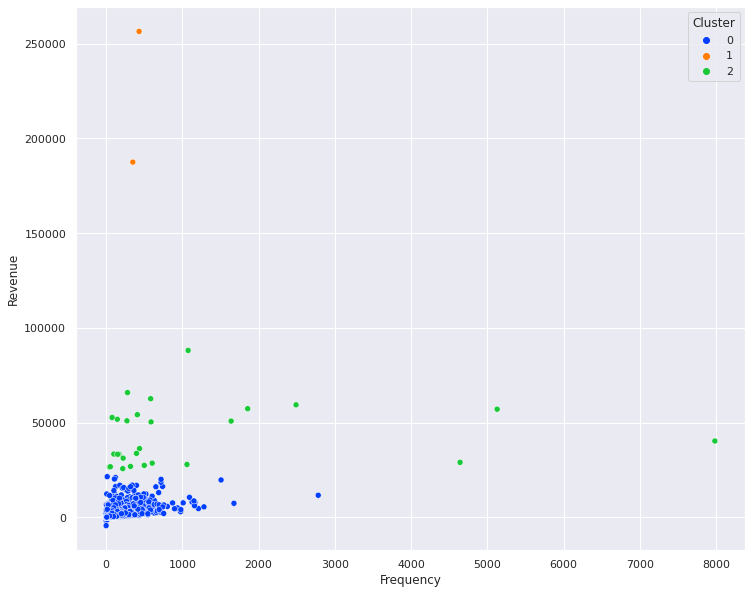

In [ ]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
sns.scatterplot(data=data_new, x="Frequency", y="Revenue", hue="Cluster", palette="bright");

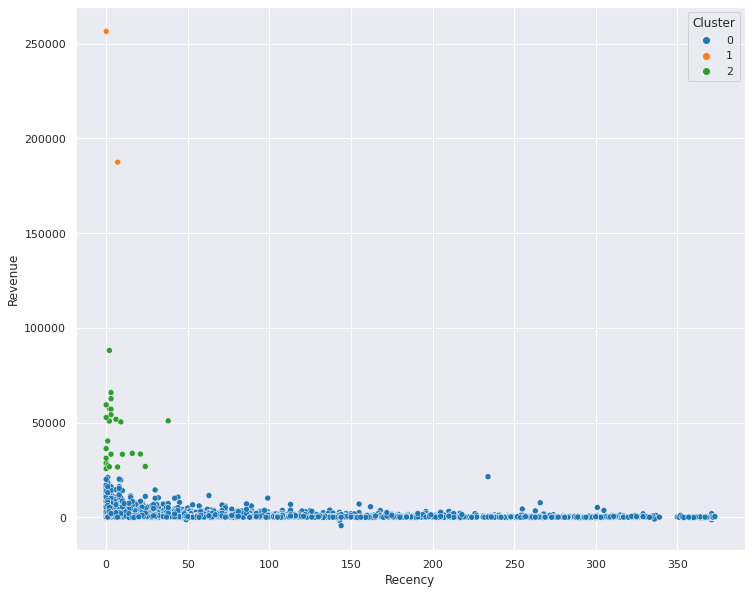

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=data_new
                               , x="Recency", y="Revenue", hue="Cluster", palette="tab10");

**Discussion:** 
- What do you think about this way of clustering ?

- What insight do the new clusters tell us ?
